### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
import plotly.express as px

### Dataset Loading

In [2]:
data = pd.read_csv("House_Rent_Dataset.csv")

### Dataset First View

In [76]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [77]:
data.tail(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4736,2022-06-28,3,15000,1500,Lower Basement out of 2,Super Area,Almasguda,Hyderabad,Semi-Furnished,Family,3,Contact Owner
4737,2022-07-07,3,15000,1500,Lower Basement out of 2,Super Area,Almasguda,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4738,2022-07-06,2,17000,855,4 out of 5,Carpet Area,"Godavari Homes, Quthbullapur",Hyderabad,Unfurnished,Bachelors,2,Contact Agent
4739,2022-07-06,2,25000,1040,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
4740,2022-06-02,2,12000,1350,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


### Dataset Rows & Columns count

In [78]:
r_c = data.shape #Shape returns the number of column and row as tuple (a, b)

row_count = r_c[0]
column_count = r_c[1]

In [79]:
row_count

4746

In [80]:
column_count

12

### Dataset Information

In [81]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [82]:
data.describe() #Works on numeric values

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


#### Duplicate Values

In [83]:
# Dataset Duplicate Value Count
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4741    False
4742    False
4743    False
4744    False
4745    False
Length: 4746, dtype: bool

In [84]:
#count the number of duplicated values
data.duplicated().sum()

0

#### Missing Values/Null Values

In [85]:
# Missing Values/Null Values Count
data.isnull()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,False,False,False,False,False,False,False,False,False,False,False,False
4742,False,False,False,False,False,False,False,False,False,False,False,False
4743,False,False,False,False,False,False,False,False,False,False,False,False
4744,False,False,False,False,False,False,False,False,False,False,False,False


In [86]:
#count the number of null values
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

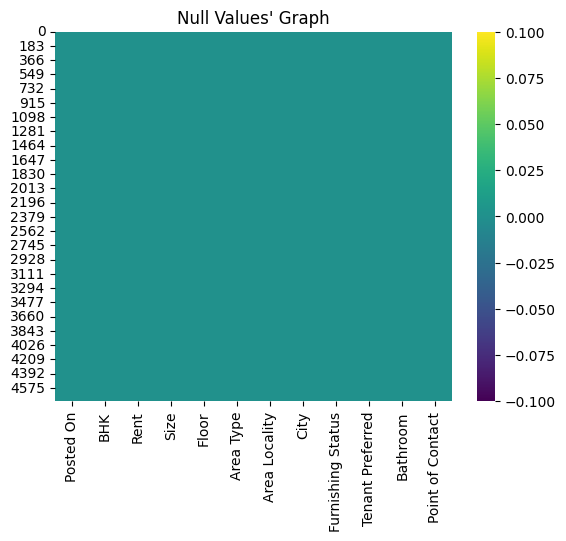

In [87]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cmap='viridis')
plt.title("Null Values' Graph")
plt.show()

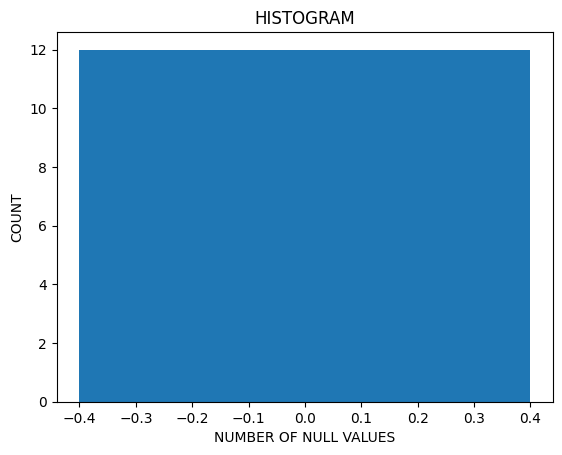

In [88]:
nc = data.isnull().sum(axis=0)
plt.hist(nc, bins=range(max(nc)+2), align='left', rwidth=0.8)
plt.xlabel('NUMBER OF NULL VALUES')
plt.ylabel('COUNT')
plt.title('HISTOGRAM')
plt.show()

In [89]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [90]:
# Dataset Describe
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


#### Check Unique Values for each variable.

In [91]:
data['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [92]:
for i in data.columns:
    uv = data[i].unique()
    print(f"UNIQUE VALUES OF '{i}': {uv}")

UNIQUE VALUES OF 'Posted On': ['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23'
 '2022-05-14' '2022-05-05' '2022-06-01' '2022-05-17' '2022-06-09'
 '2022-07-02' '2022-06-14' '2022-06-15' '2022-05-28' '2022-05-22'
 '2022-06-18' '2022-06-25' '2022-06-22' '2022-05-21' '2022-06-26'
 '2022-06-16' '2022-06-29' '2022-05-10' '2022-05-12' '2022-06-03'
 '2022-05-31' '2022-06-10' '2022-06-24' '2022-04-30' '2022-05-27'
 '2022-06-06' '2022-05-20' '2022-05-26' '2022-07-03' '2022-04-23'
 '2022-06-19' '2022-07-06' '2022-06-04' '2022-05-30' '2022-06-08'
 '2022-05-03' '2022-05-07' '2022-06-27' '2022-05-15' '2022-04-28'
 '2022-06-28' '2022-06-23' '2022-06-13' '2022-05-04' '2022-04-25'
 '2022-05-06' '2022-06-30' '2022-07-01' '2022-06-17' '2022-06-11'
 '2022-05-11' '2022-06-12' '2022-06-05' '2022-05-25' '2022-05-24'
 '2022-05-19' '2022-04-24' '2022-04-27' '2022-05-08' '2022-04-26'
 '2022-06-02' '2022-05-29' '2022-07-07' '2022-

#### Data Wrangling Code

In [93]:
numeric = []
for i in data:
    if data[i].dtypes=='int64':
        numeric.append(i)

numeric

['BHK', 'Rent', 'Size', 'Bathroom']

#### Chart - 1

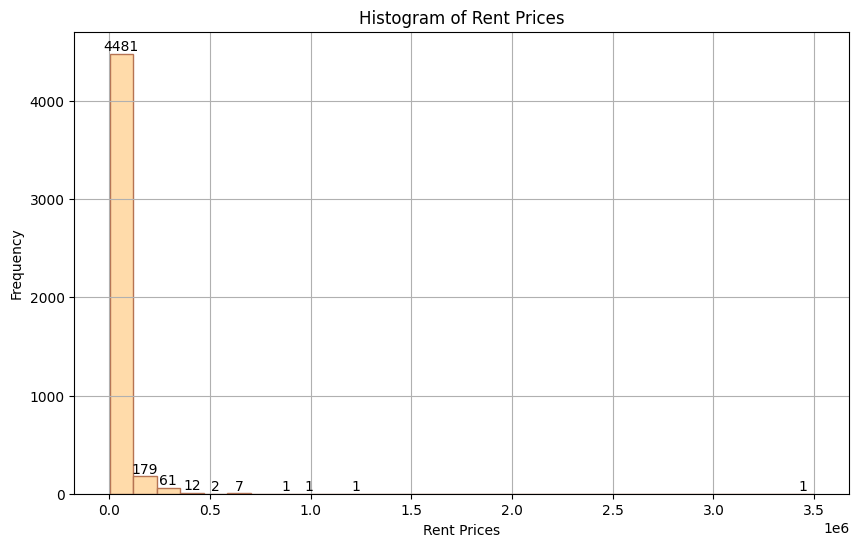

In [94]:
plt.figure(figsize=(10, 6))
counts, bins, bars = plt.hist(data['Rent'], bins=30, color='#FFDBAA', edgecolor='#B67352')
plt.title('Histogram of Rent Prices')
plt.xlabel('Rent Prices')
plt.ylabel('Frequency')
plt.grid(True)

for count, bar in zip(counts, bars):
    if count != 0:
        plt.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                str(int(count)),
                ha='center',
                va='bottom')

plt.show()

#### Chart - 2

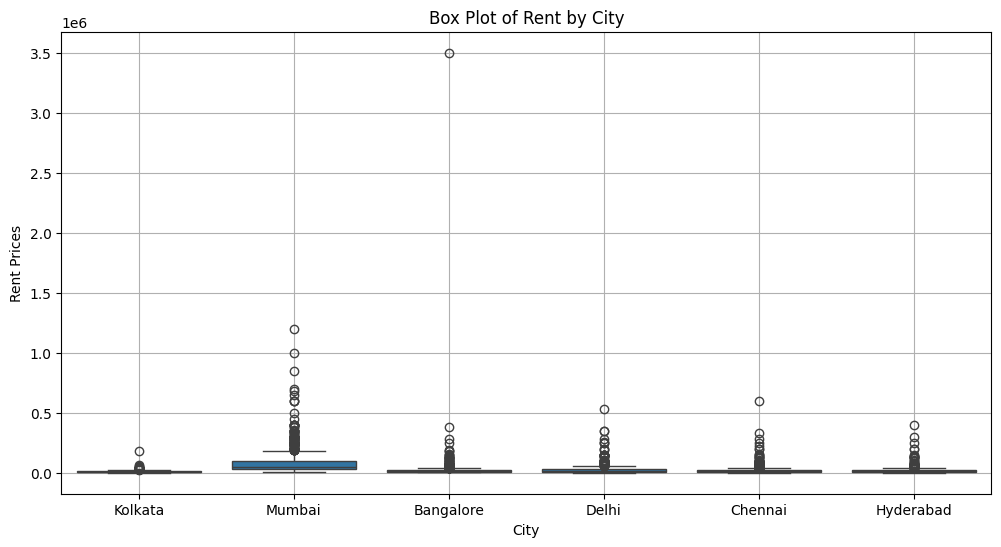

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Rent', data=data)
plt.title('Box Plot of Rent by City')
plt.xlabel('City')
plt.ylabel('Rent Prices')
plt.grid(True)

plt.show()

#### Chart - 3

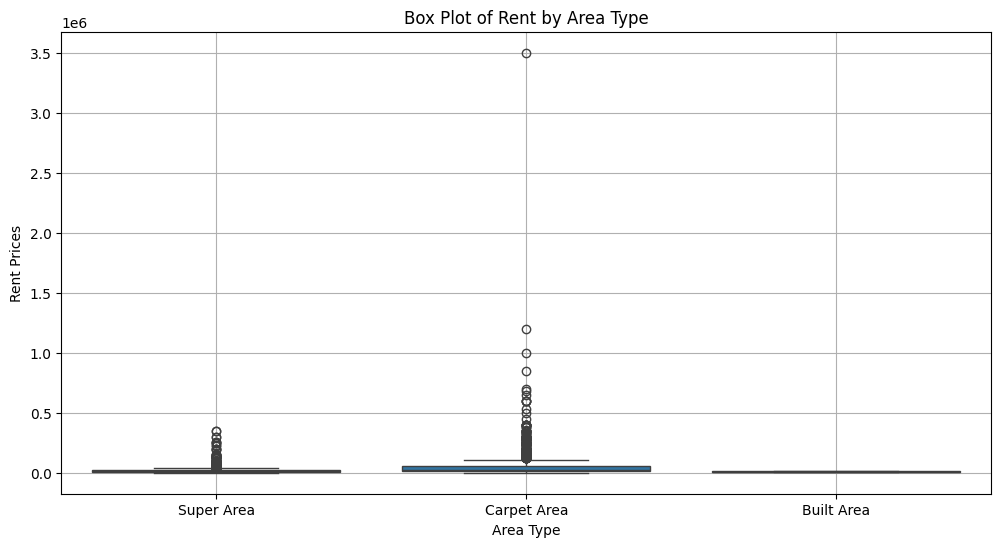

In [96]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area Type', y='Rent', data=data)
plt.title('Box Plot of Rent by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Rent Prices')
plt.grid(True)

plt.show()

#### Chart - 4

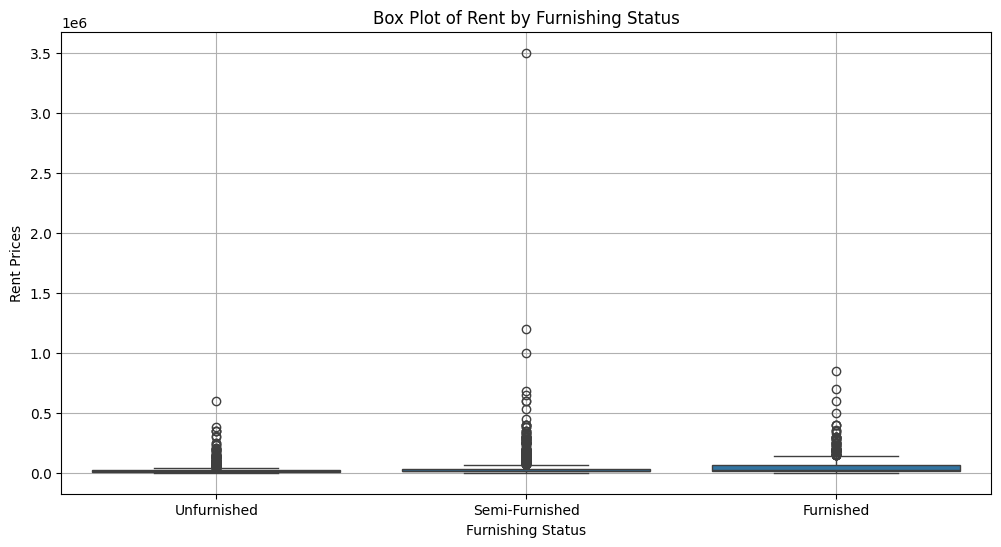

In [97]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Furnishing Status', y='Rent', data=data)
plt.title('Box Plot of Rent by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Rent Prices')
plt.grid(True)

plt.show()

#### Chart - 5

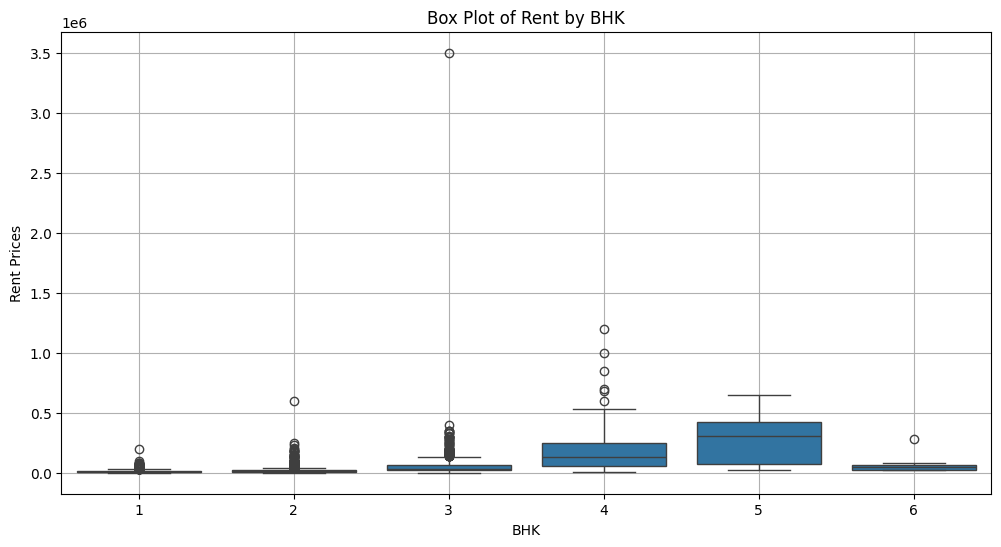

In [98]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='BHK', y='Rent', data=data)
plt.title('Box Plot of Rent by BHK')
plt.xlabel('BHK')
plt.ylabel('Rent Prices')
plt.grid(True)

plt.show()

#### Chart - 6

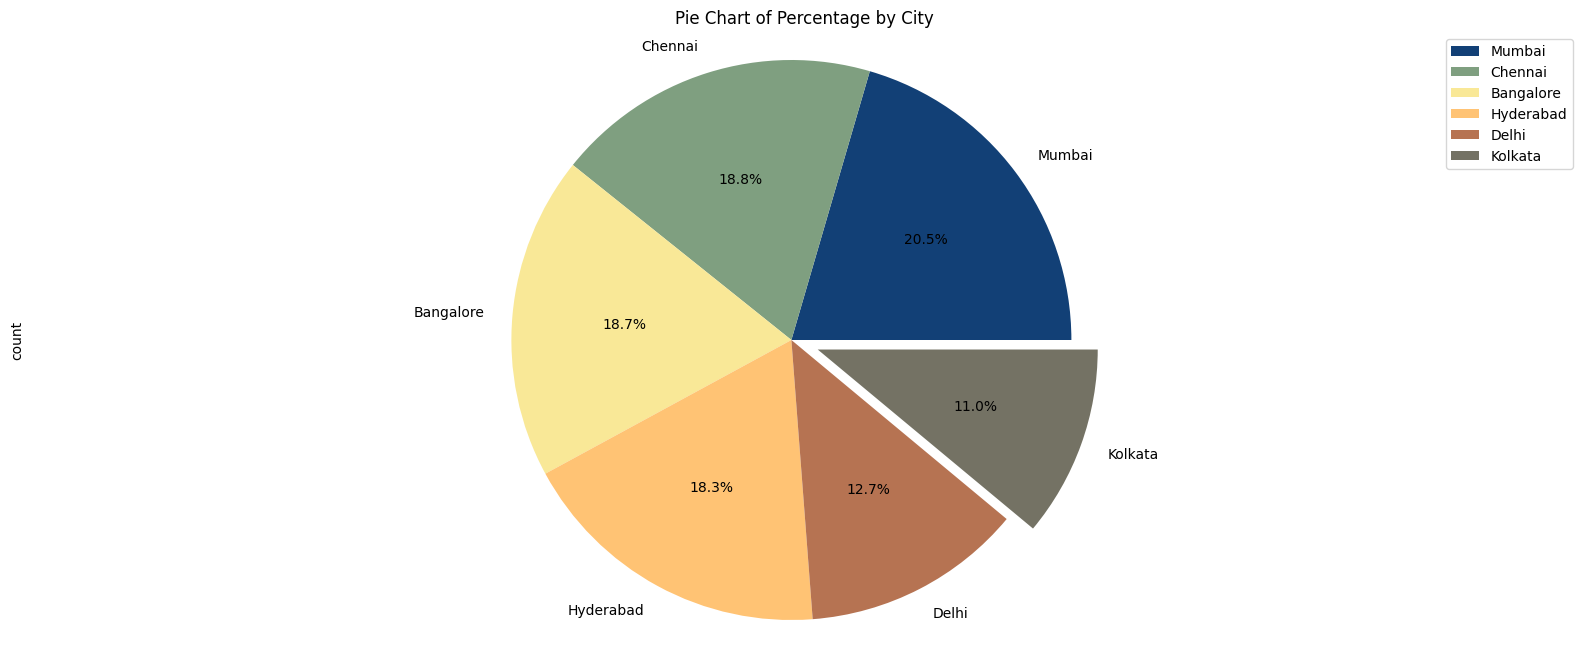

In [99]:
plt.figure(figsize = (20, 8))
city_count = data["City"].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#124076', '#7F9F80', '#F9E897', '#FFC374','#B67352' ,'#747264']
city_count.plot(kind = 'pie', colors = colors, explode = explode, autopct = '%1.1f%%')

plt.axis('equal')
plt.legend(labels = city_count.index, loc = "best")
plt.title('Pie Chart of Percentage by City')

plt.show()

#### Chart - 7

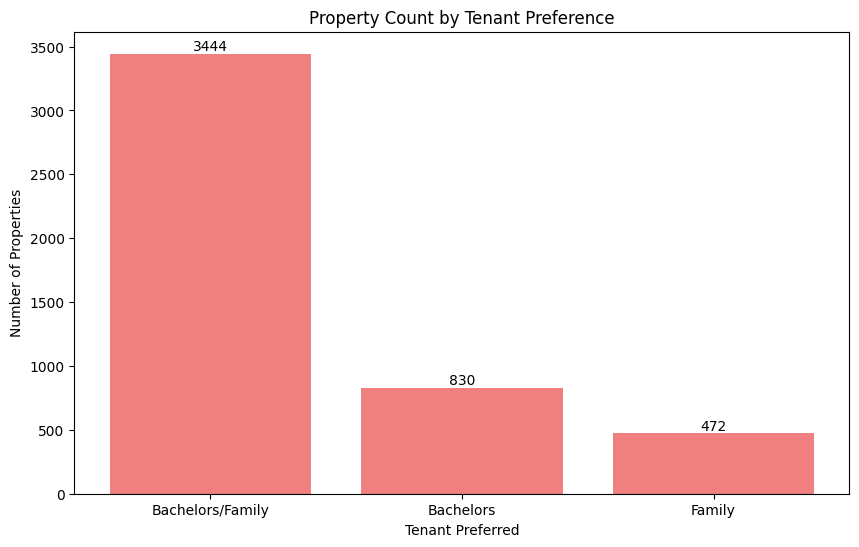

In [100]:
tenant_count = data['Tenant Preferred'].value_counts()
plt.figure(figsize=(10, 6))
bar_graph = plt.bar(tenant_count.index, tenant_count.values, color='lightcoral')

for bar in bar_graph:
    plt.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(int(bar.get_height())),
            ha='center',
            va='bottom')

plt.xlabel('Tenant Preferred')
plt.ylabel('Number of Properties')
plt.title('Property Count by Tenant Preference')

plt.show()

#### Chart - 8

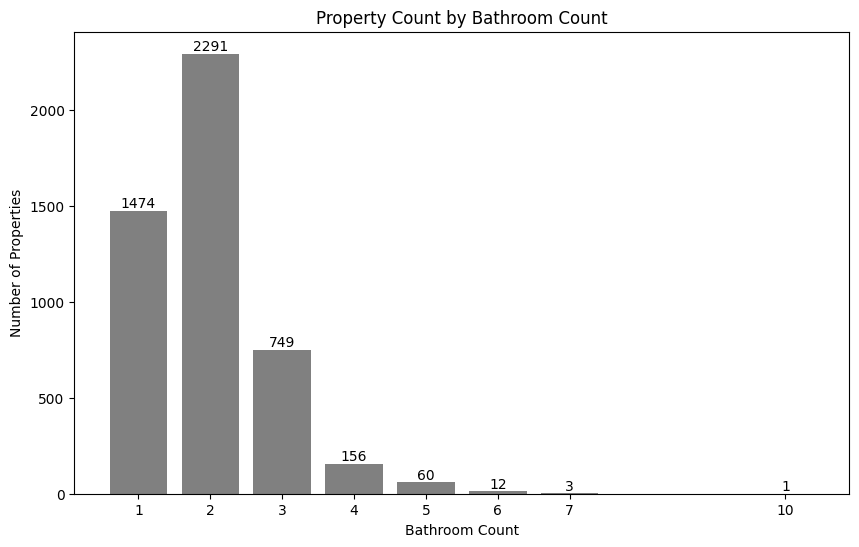

In [101]:
bathroom_count = data['Bathroom'].value_counts()
plt.figure(figsize=(10, 6))
bar_graph = plt.bar(bathroom_count.index, bathroom_count.values, color='gray')

for bar in bar_graph:
    plt.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(int(bar.get_height())),
            ha='center',
            va='bottom')

plt.xlabel('Bathroom Count')
plt.ylabel('Number of Properties')
plt.title('Property Count by Bathroom Count')
plt.xticks(bathroom_count.index)

plt.show()

#### Chart - 9

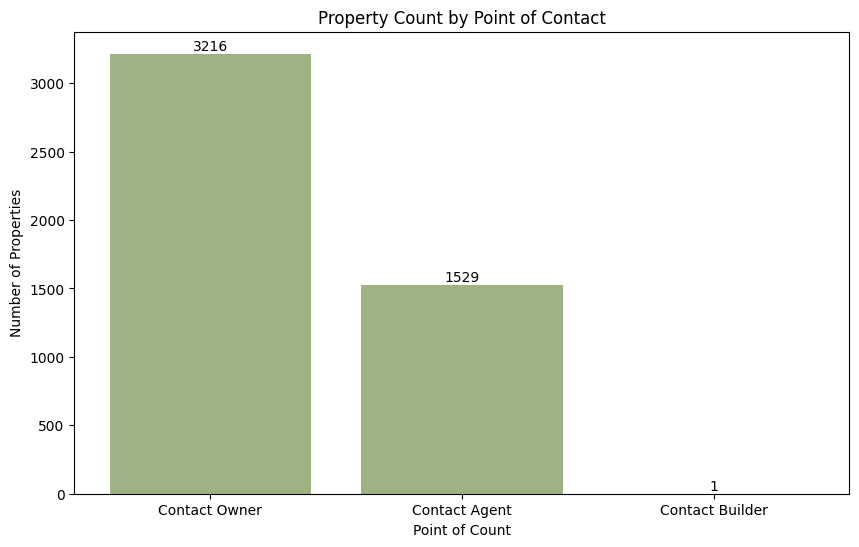

In [102]:
poc_count = data['Point of Contact'].value_counts()
plt.figure(figsize=(10, 6))
bar_graph = plt.bar(poc_count.index, poc_count.values, color='#9EB384')

for bar in bar_graph:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             str(int(bar.get_height())),
             ha='center',
             va='bottom')

plt.xlabel('Point of Count')
plt.ylabel('Number of Properties')
plt.title('Property Count by Point of Contact')

plt.show()

#### Chart - 10

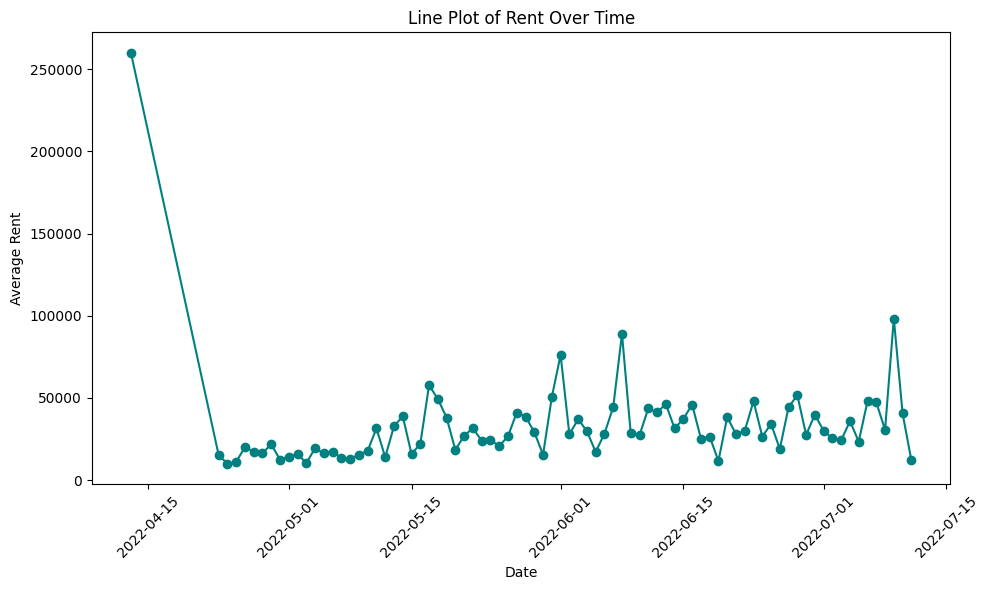

In [103]:
data['Posted On'] = pd.to_datetime(data['Posted On'])
rent_over_time = data.groupby('Posted On')['Rent'].mean()
plt.figure(figsize=(10, 6))
plt.plot(rent_over_time.index, rent_over_time.values, marker='o', linestyle='-', color='teal')
plt.title('Line Plot of Rent Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Chart - 11

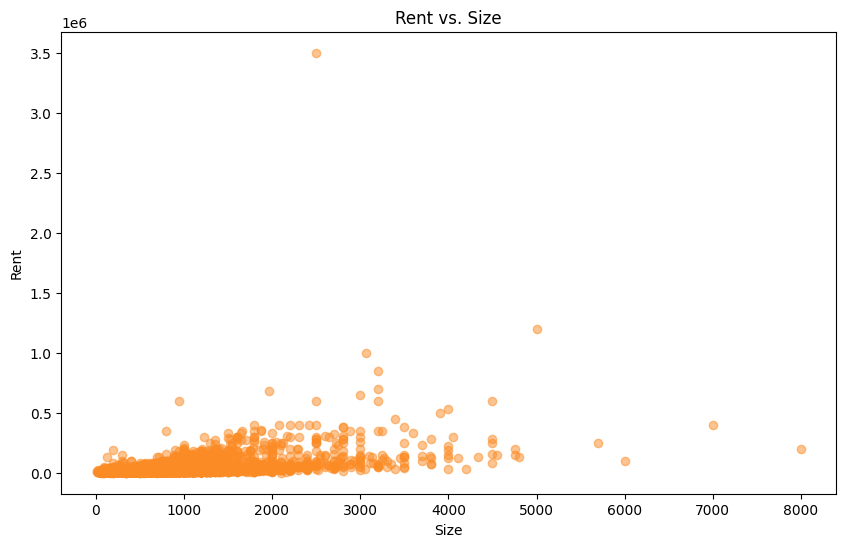

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Size'], data['Rent'], color='#FB8B24', alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Rent vs. Size')

plt.show()

#### Chart - 12

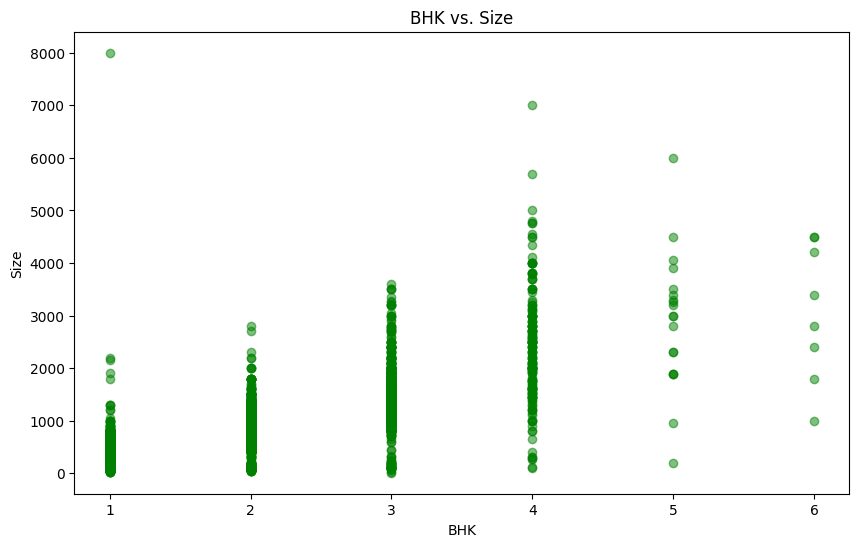

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(data['BHK'], data['Size'], color='green', alpha=0.5)
plt.xlabel('BHK')
plt.ylabel('Size')
plt.title('BHK vs. Size')

plt.show()

#### Chart - 13

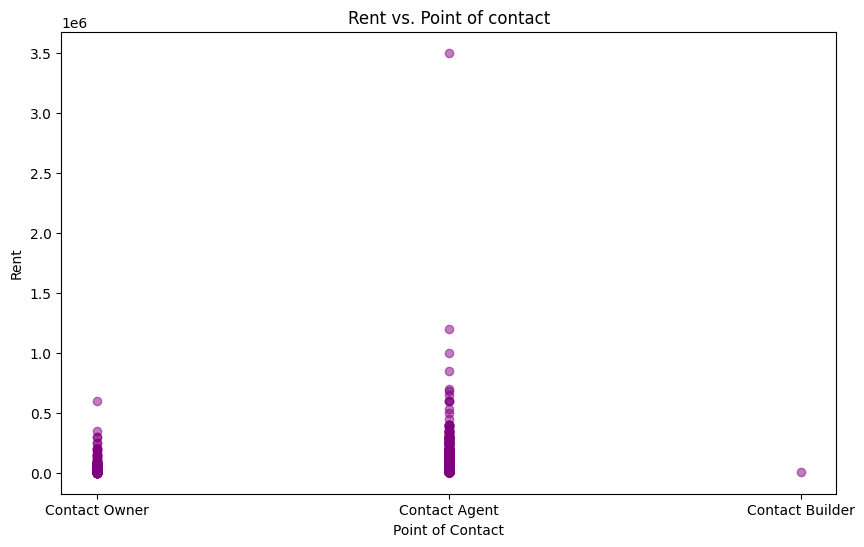

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Point of Contact'], data['Rent'], color='purple', alpha=0.5)
plt.xlabel('Point of Contact')
plt.ylabel('Rent')
plt.title('Rent vs. Point of contact')

plt.show()

#### Chart - 14 - Correlation Heatmap

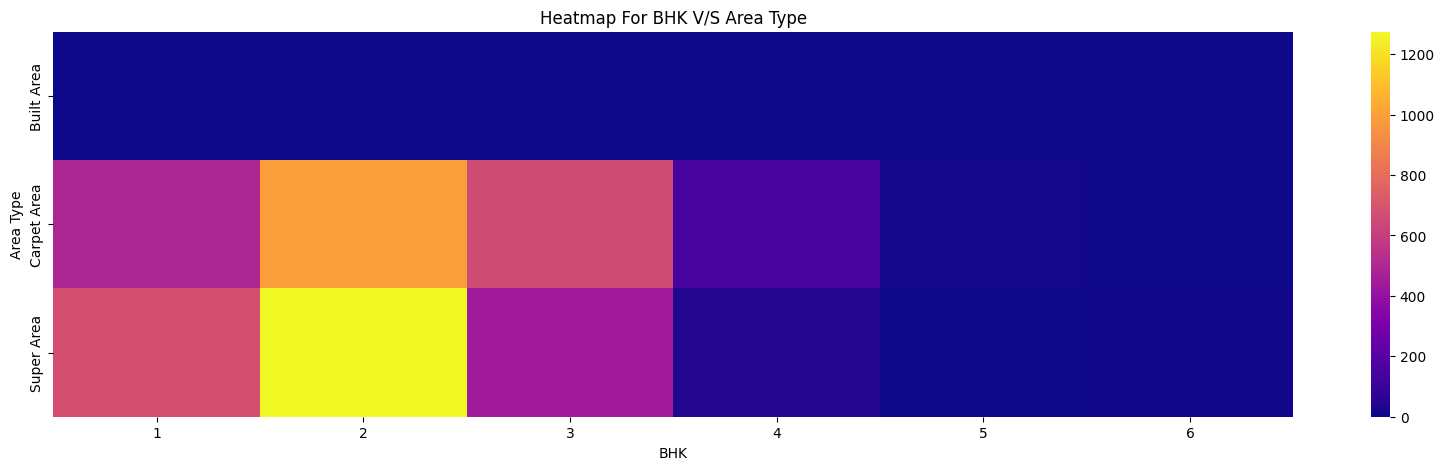

In [107]:
plt.figure(figsize = (20, 5))
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(data["Area Type"],data["BHK"]),cmap = colormap);

plt.title('Heatmap For BHK V/S Area Type')
plt.xlabel('BHK')
plt.ylabel('Area Type')

plt.show()

#### Chart - 15 - Pair Plot

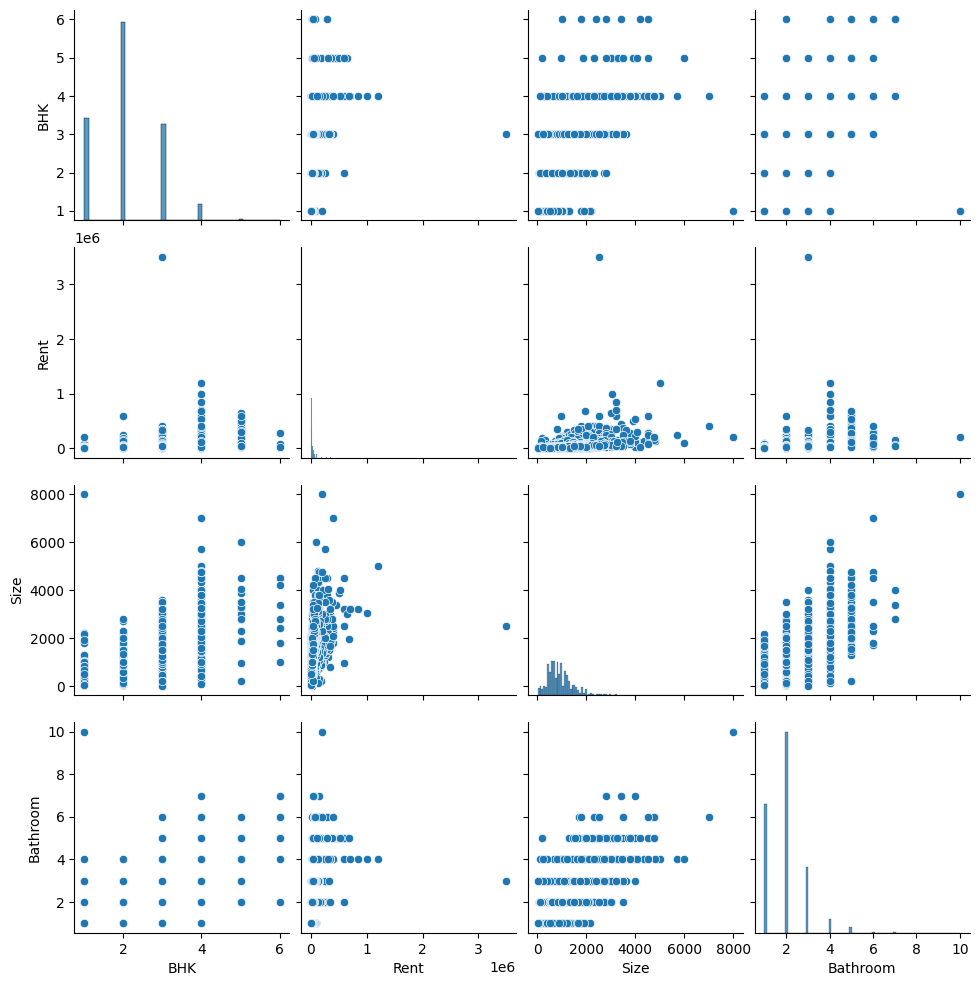

In [108]:
numeric_data = data.select_dtypes(include='number').dropna()
sns.pairplot(numeric_data)

plt.show()

#### Handling Missing Values

In [109]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [110]:
# Creating a list of all categorical columns with more than one missing value:
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

In [111]:
# Creating a list of all numerical columns with more than one missing value:
numerical_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

for feature in numerical_nan:
    print("{}: {}% missing value".format(feature,np.around(data[feature].isnull().mean(),4)))

#### Categorical Encoding

In [112]:
# converting all categorical columns into numerical.
encoder = LabelEncoder()

for column in data.select_dtypes(include = object).columns.tolist():
    data[column] = encoder.fit_transform(data[column])

In [113]:
# Handling Floor Variable
data['Floor'].unique()[:50]

array([455,  14,  10, 447, 458,  16,   1, 457, 196, 313, 192, 200, 301,
       267, 347, 312, 398, 198, 270,  17, 419, 460, 184, 475, 459, 271,
        48, 331,  43, 466, 202, 297, 379, 188, 371, 316,  90, 322, 203,
        84, 333, 160, 275, 150,  50, 388,  97, 433, 479, 175])

In [114]:
# function for returning Floor level of our datset
def finde_level(sentence):
    sentence = sentence.split(" ")
    try:
        return " ".join(sentence[:2]) if sentence[1] == "Basement" else sentence[0]
    except:
        return sentence[0]

In [115]:
# function for returning number of levels of dataset
def finde_levels_number(sentence):
    sentence = sentence.split(" ")
    return sentence[-1]  if len(sentence) > 1 else "1"

In [116]:
data["Posted On"].unique()

<DatetimeArray>
['2022-05-18 00:00:00', '2022-05-13 00:00:00', '2022-05-16 00:00:00',
 '2022-07-04 00:00:00', '2022-05-09 00:00:00', '2022-04-29 00:00:00',
 '2022-06-21 00:00:00', '2022-06-07 00:00:00', '2022-06-20 00:00:00',
 '2022-05-23 00:00:00', '2022-05-14 00:00:00', '2022-05-05 00:00:00',
 '2022-06-01 00:00:00', '2022-05-17 00:00:00', '2022-06-09 00:00:00',
 '2022-07-02 00:00:00', '2022-06-14 00:00:00', '2022-06-15 00:00:00',
 '2022-05-28 00:00:00', '2022-05-22 00:00:00', '2022-06-18 00:00:00',
 '2022-06-25 00:00:00', '2022-06-22 00:00:00', '2022-05-21 00:00:00',
 '2022-06-26 00:00:00', '2022-06-16 00:00:00', '2022-06-29 00:00:00',
 '2022-05-10 00:00:00', '2022-05-12 00:00:00', '2022-06-03 00:00:00',
 '2022-05-31 00:00:00', '2022-06-10 00:00:00', '2022-06-24 00:00:00',
 '2022-04-30 00:00:00', '2022-05-27 00:00:00', '2022-06-06 00:00:00',
 '2022-05-20 00:00:00', '2022-05-26 00:00:00', '2022-07-03 00:00:00',
 '2022-04-23 00:00:00', '2022-06-19 00:00:00', '2022-07-06 00:00:00',
 '20

In [117]:
data["Posted On"] = pd.to_datetime(data["Posted On"])

In [118]:
# create new columns "Year", "Month"
data["Year"] = data["Posted On"].dt.year
data["Month"] = data["Posted On"].dt.month

In [119]:
# function for finding season of our dataset
def find_seasons(month_number):
    if month_number in [12, 1, 2]:
        return 1
    elif month_number in [3, 4, 5]:
        return 2
    elif month_number in [6, 7, 8]:
        return 3
    elif month_number in [9, 10, 11]:
        return 4

In [120]:
data["Season"] = data["Month"].apply(find_seasons)

In [121]:
data.drop(columns = "Posted On", inplace = True)

In [122]:
data.dtypes

BHK                  int64
Rent                 int64
Size                 int64
Floor                int32
Area Type            int32
Area Locality        int32
City                 int32
Furnishing Status    int32
Tenant Preferred     int32
Bathroom             int64
Point of Contact     int32
Year                 int32
Month                int32
Season               int64
dtype: object

#### Data Splitting

In [123]:
data["Rent"] = np.log10(data["Rent"])

In [124]:
# Split your data to train and test.
Target = data["Rent"]
training = data.drop(columns = ["Rent"])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(training, Target, test_size = 0.3, random_state = 42)

In [126]:
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3322, 13)
x_test shape:  (1424, 13)
y_train shape:  (3322,)
y_test shape:  (1424,)


#### Data Scaling

In [127]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#### ML Model - 1

In [128]:
from sklearn.linear_model import LinearRegression, Ridge
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [129]:
model1.score(X_test, y_test)

0.7330051055316977

#### ML Model - 2

In [130]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model2 = svm.SVR()

model2.fit(X_train,y_train)

SVR()

In [131]:
# visualizing metric score chart
model2.score(X_test, y_test)

0.7922955360034856

#### ML MODEL - 3

In [132]:
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)

RandomForestRegressor()

In [133]:
model3.score(X_test, y_test)

0.8283111134730348